In [35]:
import tensorflow as tf 
# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


2022-04-15 16:29:55.045683: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-15 16:29:55.045936: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1070 computeCapability: 6.1
coreClock: 1.7845GHz coreCount: 15 deviceMemorySize: 7.93GiB deviceMemoryBandwidth: 238.66GiB/s
2022-04-15 16:29:55.045961: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-04-15 16:29:55.045984: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-04-15 16:29:55.045996: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2022-04-15 16:29:55.046005: I tensorflow/stream_execut

In [36]:
import pandas as pd 

In [45]:
cols = ["date", "tweet", "sentiment"]
df_new = pd.read_csv('CSVFiles/bitcointweets-new.csv')
df_new = df_new.iloc[:,[0,1,7]]
df_new.columns = cols 
for index, row in df_new.iterrows(): 
    if row['sentiment'] == "['neutral']":
        row['sentiment'] = 2 
    elif row['sentiment'] == "['positive']":
        row['sentiment'] = 1
    else:
        row['sentiment'] = 0

In [47]:
df_new.to_csv('CSVFiles/new-tweets.csv')

In [49]:
# convert all textual sentiment to numerical values 

for index, row in df_new.iterrows(): 
    if row['sentiment'] == "['neutral']":
        row['sentiment'] = int(2) 
    elif row['sentiment'] == "['positive']":
        row['sentiment'] = int(1)
    else:
        row['sentiment'] = int(0)
df_new.dtypes
# df_new.to_csv('CSVFiles/new-tweets.csv')

date         object
tweet        object
sentiment    object
dtype: object

In [21]:
# extract neutral tweets 
df_neutral = df_new.loc[df_new['sentiment']==2]
df_neutral

,date,tweet,sentiment
0,Fri Mar 23 00:40:34 +0000 2018,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,2
6,Fri Mar 23 00:40:37 +0000 2018,One click to start mining cryptocurrencies tog...,2
10,Fri Mar 23 00:40:40 +0000 2018,RT @livemarketcap: ICE Agency Charges Payza an...,2
11,Fri Mar 23 00:40:41 +0000 2018,RT @Vaultoro: We have all seen the HTTP protoc...,2
12,Fri Mar 23 00:40:42 +0000 2018,@eatBCH @Bitcoin @signalapp @myWickr @Samsung ...,2
...,...,...,...
50845,Fri Mar 23 08:55:14 +0000 2018,Bitcoin: Mastering Bitcoin: Discover How I (An...,2
50847,Fri Mar 23 08:55:14 +0000 2018,"#Zhao #Dong #Recounts How He Lost 9,000 #BTC h...",2
50850,Fri Mar 23 08:55:15 +0000 2018,Bitcoin Price Technical Analysis for 03/23/201...,2
50852,Fri Mar 23 08:55:16 +0000 2018,"RT @PhotoCoin_io: 2,000,000 PHT TOKEN #airdrop...",2


In [22]:
df_old = pd.read_csv('CSVFiles/old-tweets.csv')

In [23]:
df_old = df_old.drop('Unnamed: 0',axis=1)
df_old.columns = ['date', 'tweet', 'sentiment']

In [24]:
for index, row in df_old.iterrows(): 
    if row['sentiment'] == "Positive":
        row['sentiment'] = 1
    else:
        row['sentiment'] = 0

In [25]:
df_old

,date,tweet,sentiment
0,2019-05-27,È appena uscito un nuovo video! LES CRYPTOMONN...,1
1,2019-05-27,Cardano: Digitize Currencies; EOS https://t.co...,1
2,2019-05-27,Another Test tweet that wasn't caught in the s...,1
3,2019-05-27,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...,1
4,2019-05-27,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...,1
...,...,...,...
59495,2019-05-21,"💯Selling Crazy Account!(aerial, black knight, ...",0
59496,2019-05-21,Invictus – Providing Diversified Cryptocurrenc...,0
59497,2019-05-21,Bearish Divergences Form for Litecoin and Dash...,0
59498,2019-05-21,BITCOIN VOR PARABOLISCHER WACHSTUMSPHASE https...,0


In [ ]:
df_old

In [26]:
df_old_added_neutral = pd.concat([df_old, df_neutral], ignore_index=True)
df_old_added_neutral

,date,tweet,sentiment
0,2019-05-27,È appena uscito un nuovo video! LES CRYPTOMONN...,1
1,2019-05-27,Cardano: Digitize Currencies; EOS https://t.co...,1
2,2019-05-27,Another Test tweet that wasn't caught in the s...,1
3,2019-05-27,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...,1
4,2019-05-27,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...,1
...,...,...,...
81433,Fri Mar 23 08:55:14 +0000 2018,Bitcoin: Mastering Bitcoin: Discover How I (An...,2
81434,Fri Mar 23 08:55:14 +0000 2018,"#Zhao #Dong #Recounts How He Lost 9,000 #BTC h...",2
81435,Fri Mar 23 08:55:15 +0000 2018,Bitcoin Price Technical Analysis for 03/23/201...,2
81436,Fri Mar 23 08:55:16 +0000 2018,"RT @PhotoCoin_io: 2,000,000 PHT TOKEN #airdrop...",2


In [27]:
df_old_added_neutral.to_csv('CSVFiles/old-tweets-added-neutral.csv')

Text(0.5, 0, 'Sentiment Score')

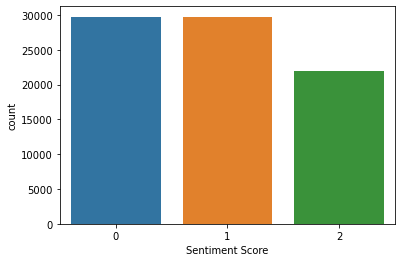

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.countplot(x=df_old_added_neutral.sentiment)
plt.xlabel('Sentiment Score')

In [34]:
df_old.to_csv('CSVFiles/old-tweets.csv')

In [30]:
# now we will add negative tweets from old dataset to new dataset 
# because new dataset has fewer positive tweets causing some imbalance 
df_old_negative = df_old.loc[df_old['sentiment']==0]
df_old_negative = df_old_negative.iloc[:17000]
df_old_negative_added_positive_neutral = pd.concat([df_old_negative, df_new], ignore_index=True)
df_old_negative_added_positive_neutral.sample(frac=1, ignore_index=True)

,date,tweet,sentiment
0,Fri Mar 23 04:35:33 +0000 2018,@bilenokbilenok Bitcoin BTG(OFFICIAL) (Bitcoin...,1
1,Fri Mar 23 03:42:20 +0000 2018,Interesting. In late January crypto influence...,1
2,Fri Mar 23 04:12:51 +0000 2018,RT @hodlersport14: Airdrop 🍬🍬#100 WIT tokens（v...,2
3,Fri Mar 23 07:00:05 +0000 2018,US Marshals Office Auctions Off Another $18.7M...,2
4,Fri Mar 23 07:01:45 +0000 2018,A Non-Anonymous Stablecoin? Saga Launches With...,2
...,...,...,...
67853,2019-05-21,Bitcoin (BTC) probablement au bord du rallye p...,0
67854,2019-05-21,We’ve All Heard The Question “Should I Invest ...,0
67855,Fri Mar 23 02:25:52 +0000 2018,RT @RealPython: A fun Python Project for Begin...,1
67856,Fri Mar 23 02:21:15 +0000 2018,RT @AIRDROP_AGADIR: #Airdrop PhotoCoin Airdrop...,1


Text(0.5, 0, 'Sentiment Score')

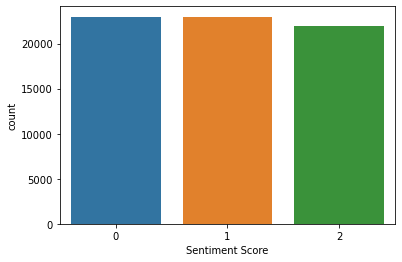

In [31]:
sns.countplot(x=df_old_negative_added_positive_neutral.sentiment)
plt.xlabel('Sentiment Score')

In [32]:
df_old_negative_added_positive_neutral.to_csv('CSVFiles/new-tweets-added-old-negative.csv')

In [33]:
df_old_negative_added_positive_neutral

,date,tweet,sentiment
0,2019-05-21,"BTC IS STILL GOING STRONG!!\n\nThus, we are gi...",0
1,2019-05-21,IDAX #Japan #エアドロップ\n\n海外取引所 #IDAX 日本語アカウントのオー...,0
2,2019-05-21,Multiply your Bitcoin and Ethereum: https://t...,0
3,2019-05-21,Game of DOGEs begun! Become a champion of the ...,0
4,2019-05-21,"$BTC levels \n\nSupport: 7600, 7200, 6800, 640...",0
...,...,...,...
67853,Fri Mar 23 08:55:16 +0000 2018,RT @fixy_app: Fixy Network brings popular cryp...,1
67854,Fri Mar 23 08:55:17 +0000 2018,RT @bethereumteam: After a successful launch o...,1
67855,Fri Mar 23 08:55:18 +0000 2018,"RT @GymRewards: Buy #GYMRewards Tokens, Bonus ...",2
67856,Fri Mar 23 08:55:19 +0000 2018,I added a video to a @YouTube playlist https:/...,1
